**Import the libraries .. **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import MaxPool2D,Flatten,Conv2D
from sklearn.metrics import confusion_matrix,classification_report


**load the data_set using keras **


In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [ ]:
x_train.shape 

(60000, 28, 28)

# Checking the shape of traning data_set 
**There are 60000 images and 28 by 28 px size and 1 color channel**

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

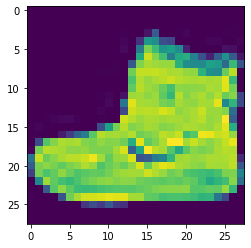

In [ ]:
plt.imshow(x_train[0])

# **Label of the images **

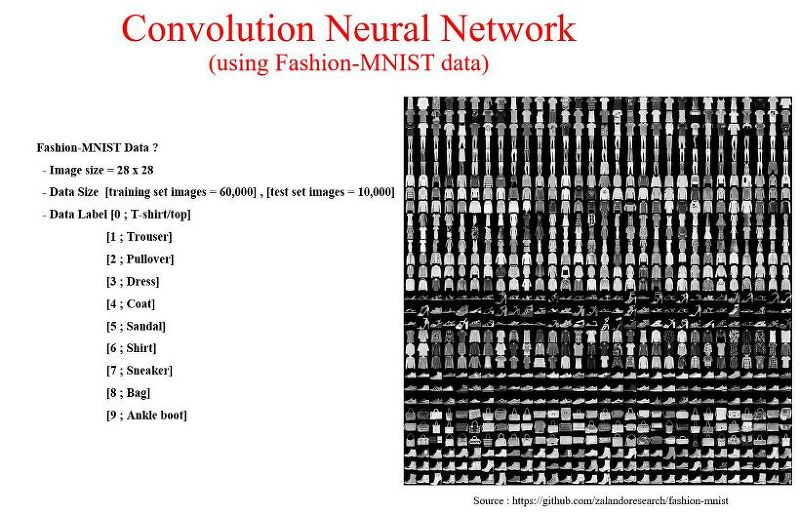

In [ ]:
y_train[0]

9

In [ ]:
y_train[1]

0

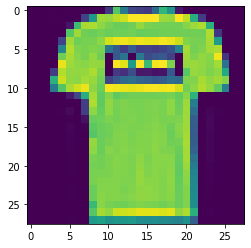

In [ ]:
plt.imshow(x_train[1])

***Feature scaling is essential for machine learning algorithms that calculate distances between data. ... Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.***

In [ ]:
x_train = x_train/255
x_test = x_test/255

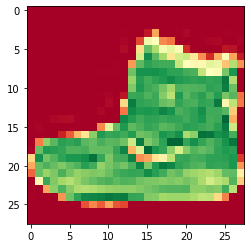

In [ ]:
plt.imshow(x_train[0],cmap='RdYlGn')

**Reshaping our Features because the model should have 4 dimensions **

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train.shape


(60000, 28, 28, 1)

**here labels are continuous values   thus  y we change to_category using kearas(utils)**

In [ ]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(1,1),padding='same'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))




# Image: by looking the images we can easily implement the algorithm .

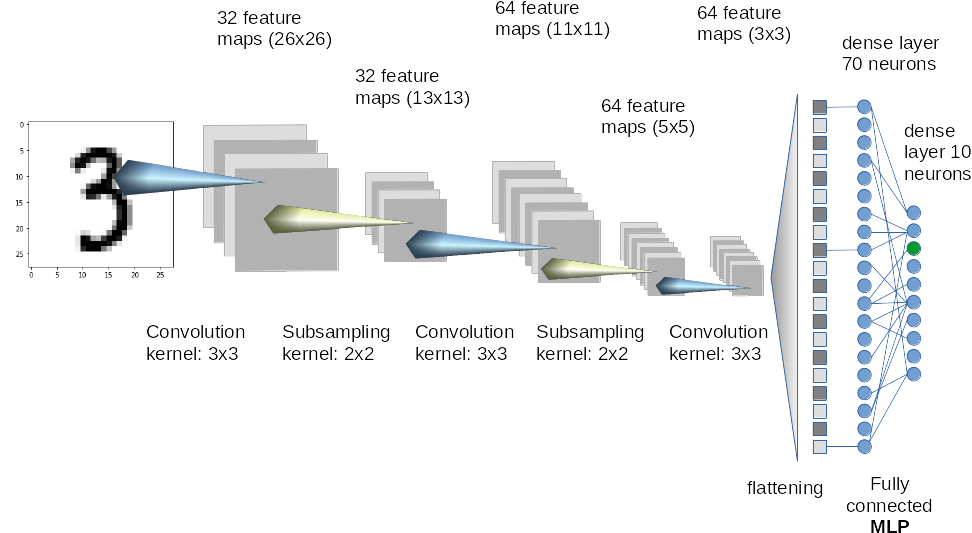


# Compile the Model 

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)



# Early_stopping using kears 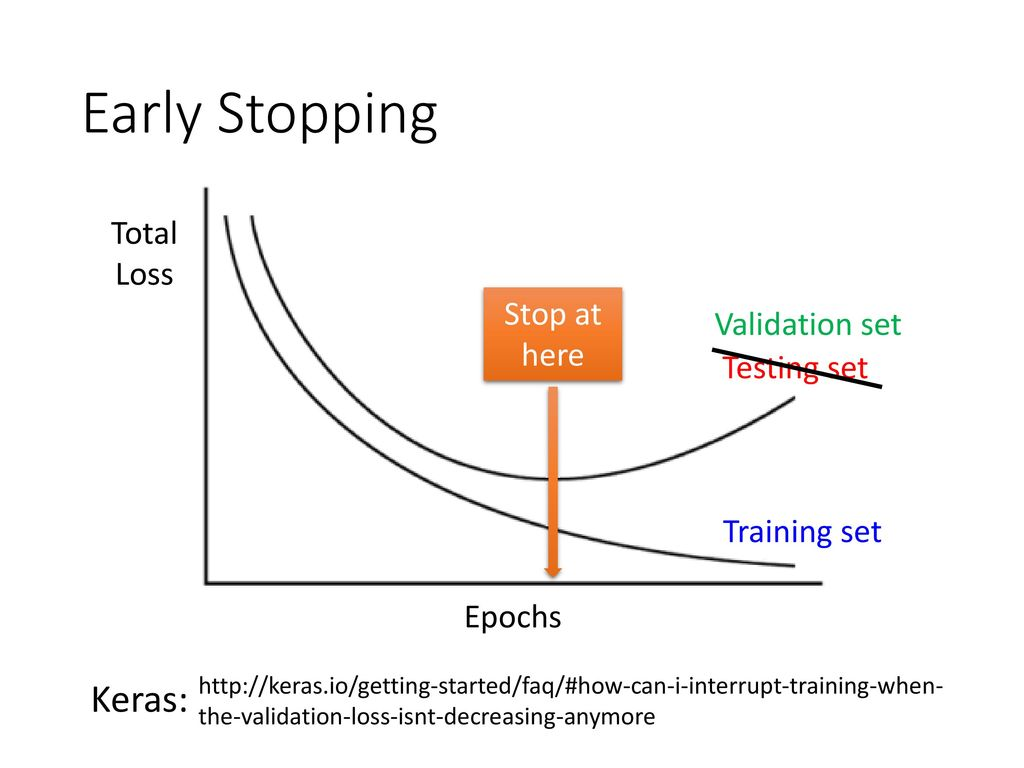

In [ ]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=3,earlystopping=[early_stop])

Epoch 1/3
1875/1875 [==============================] - 154s 82ms/step - loss: 0.4567 - accuracy: 0.8393 - val_loss: 0.2903 - val_accuracy: 0.8953
Epoch 2/3
1875/1875 [==============================] - 153s 81ms/step - loss: 0.2382 - accuracy: 0.9139 - val_loss: 0.2773 - val_accuracy: 0.9014
Epoch 3/3
1875/1875 [==============================] - 152s 81ms/step - loss: 0.1805 - accuracy: 0.9335 - val_loss: 0.2652 - val_accuracy: 0.9079


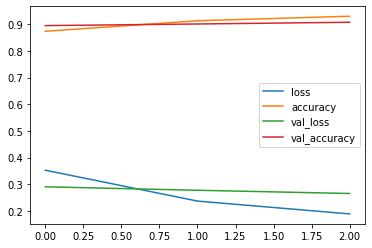

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

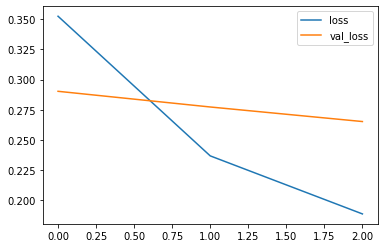

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.91      0.77      0.83      1000
           3       0.92      0.93      0.92      1000
           4       0.80      0.90      0.84      1000
           5       0.96      1.00      0.98      1000
           6       0.73      0.76      0.75      1000
           7       0.97      0.95      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
single_img = x_train[0]

# **predicting the single image **
** here model ascept the 4dim here (1,28,28,1)**
1->img
28->width
28->height
1->color_channel


In [ ]:
# ignore the warnings

model.predict_classes(single_img.reshape(1,28,28,1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9])